Taking date from ed's old students. 

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SciServer
from SciServer import Authentication, LoginPortal, Config, CasJobs, SkyQuery, SciDrive, SkyServer, Files, Jobs

Authentication_loginName = 'snegussie'
Authentication_loginPassword = 'kokjed-4sogvy-bIhxyd'

token1 = Authentication.login(Authentication_loginName, Authentication_loginPassword)
user = Authentication.getKeystoneUserWithToken(token1)
iden = LoginPortal.identArgIdentifier()
CasJobs_TestDatabase = "MyDB"



/var/folders/3f/g9qgz71j35z23v4byb9jtltc00031c/T/ipykernel_89497/1039595346.py:13: DeprecationWarning: Using SciServer.Authentication.identArgIdentifier is deprecated. Use SciServer.Authentication.identArgIdentifier instead.
  iden = LoginPortal.identArgIdentifier()


In [135]:
galaxiesFull = pd.read_csv("galaxies_full.csv", sep = ',')  
raGalaxies = galaxiesFull["RA(deg)"] #right ascention
decGalaxies = galaxiesFull["DEC(deg)"] #decllination
bestMag = galaxiesFull["Best Mag"]

sdss = pd.read_csv("allMagsSDSS.csv", sep = ',') #to 1degree radius
obsID = sdss["objid"] 
myRA = sdss["myRA"] 
myDEC = sdss["myDEC"] 
sdssRA = sdss["SDSS_RA"] 
sdssDEC = sdss["SDSS_DEC"] 
sdssPetroMag_g = sdss['petroMag_g']
sdssPetroRad_g = sdss['petroRad_g']
sdsscModelMag_g = sdss['cModelMag_g']
#print(sdssPetroMag_g)
#print(myRA)
# print(sdssRA[0:10])

In [136]:
#truncate function
def trunc(values, decimals=0):
    return np.trunc(values*10**decimals)/(10**decimals)


#reorder array
newArray = [] 
newRA = []
newDEC = []
skippedIndices = [] 
petro_g = []
raG = []
bestM = []
decG = []
petroRad_g = []
cModelMag = []
for i in range(np.size(myRA)):
    #d_RA = decimal.Decimal(sdssRA[i])
    #decimals = d_RA.as_tuple().exponent
    decimals = 2#len(str(myRA[i]).split(".")[1])
    #print(sdssRA[i])
    #print("decimals=", decimals)
    tmp1 = np.where( trunc(myRA,decimals=decimals) ==  trunc(raGalaxies[i],decimals=decimals) ) 
    #print(myRA[tmp1[0][0]],raGalaxies[i])
    #print(tmp1)
    #d_DEC = decimal.Decimal(sdssDEC[i])
    #decimals = d_DEC.as_tuple().exponent
    #decimals = 3#len(str(myDEC[i]).split(".")[1])
    #print(sdssDEC[i])
    #print("decimals=", decimals) 
    tmp2 = np.where( trunc(myDEC,decimals=decimals) ==  trunc(decGalaxies[i],decimals=decimals) ) 
    #print(tmp2)
    resultArray = (np.intersect1d(tmp1, tmp2))
    #print(resultArray)
    #print(np.size(resultArray))
    #print(resultArray)
    if np.size(resultArray) == 0 or resultArray is None: 
               skippedIndices.append(i)

    else: 
            #for j in resultArray:
                #print("raG=",raGalaxies[i])
                #print("myra=",myRA[j])
                j = resultArray[0]
                #print(j)
                bestM.append(bestMag[i])
                petro_g.append(sdssPetroMag_g[j])
                newRA.append(myRA[j])
                newDEC.append(myDEC[j])
                raG.append(raGalaxies[i])
                decG.append(decGalaxies[i])
                petroRad_g.append(sdssPetroRad_g[i])
                cModelMag.append(sdsscModelMag_g[i])
                #print(newArray)
                #print(j)f
    #print(sdssPetroMag_g[resultArray])
    
    #
#print(np.size(newArray))
#print(np.size(newRA))
#print(np.size(raGalaxies))
#a =trunc(myRA,decimals=4)
#print(a)
#Plotting Best Mag vs Petro Mag g
#print(np.size(newArray))



In [118]:
print("Writing file")

with open(r'check_ra&dec.txt', 'w') as fp:
    fp.write("Best_Mag\tPetro_Mag_g\tcModelMag\tPetroRad_g\tDifference\tMy_RA\tSDSS_RA\t\tMy_DEC\t\tSDSS_DEC\n")
    for i in range(np.size(newRA)):
        #if np.where(i == skippedIndices):
        #j = newArray[i]
        fp.write("%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\n" %( (bestM[i]), (petro_g[i]), (cModelMag[i]), (petroRad_g[i]), (np.fabs(bestM[i]-petro_g[i])), (raG[i]), (newRA[i]), (decG[i]), (newDEC[i]) ) )


Writing file


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


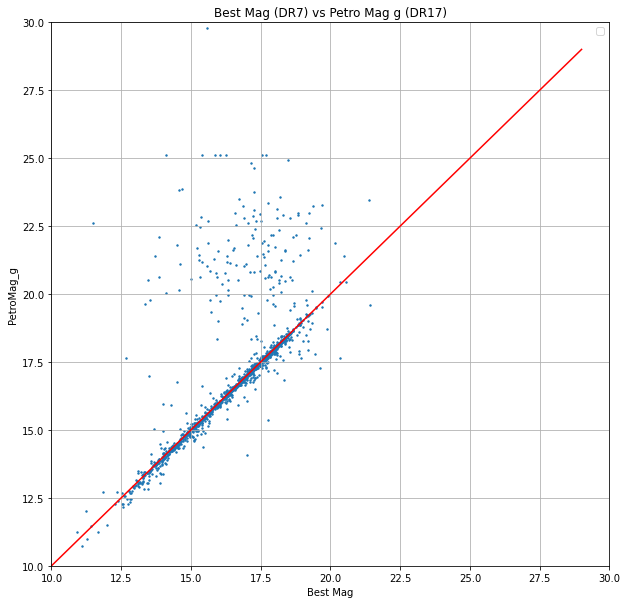

In [137]:
#plots

#x = raGalaxies[0:np.size(newRA)]
#plt.scatter(newArray, bestMag[0:np.size(newArray)], s = 5)

fig = plt.figure(figsize =(10, 10))
plt.scatter(bestM, petro_g, s = 2)
plt.plot(range(0,30), range(0,30), color = 'red')
plt.title("Best Mag (DR7) vs Petro Mag g (DR17)")
plt.xlabel("Best Mag")
plt.ylabel("PetroMag_g")
plt.xlim(10,30)
plt.ylim(10,30)
plt.legend()
plt.grid()
plt.show()  


From the previous data release to the current
DR7 vs DR17

In [94]:
"""filter = np.zeros( len(petro_g) )
indices = np.where( np.array(bestM) < np.array(petro_g) )

fig = plt.figure(figsize =(10, 10))
#plt.scatter( np.array(petro_g[int(np.array(indices))]) , np.array(bestM[int(np.array(indices))]), s = 5)
plt.scatter(petro_g[indices][:], bestM[indices][:])
plt.plot(range(0,30), range(0,30), color = 'red')
plt.title("Best Mag vs Petro Mag g")
plt.xlabel("PetroMag_g")
plt.ylabel("Best Mag")
plt.xlim(10,30)
plt.ylim(10,30)
plt.legend()
plt.grid()
plt.show() """

'filter = np.zeros( len(petro_g) )\nindices = np.where( np.array(bestM) < np.array(petro_g) )\n\nfig = plt.figure(figsize =(10, 10))\n#plt.scatter( np.array(petro_g[int(np.array(indices))]) , np.array(bestM[int(np.array(indices))]), s = 5)\nplt.scatter(petro_g[indices][:], bestM[indices][:])\nplt.plot(range(0,30), range(0,30), color = \'red\')\nplt.title("Best Mag vs Petro Mag g")\nplt.xlabel("PetroMag_g")\nplt.ylabel("Best Mag")\nplt.xlim(10,30)\nplt.ylim(10,30)\nplt.legend()\nplt.grid()\nplt.show() '

In [95]:
"""
array = [4, 10, 15]

L = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
Idx = np.array([0, 3, 7])
T = L[ Idx ]

T = [L[i] for i in Idx]
"""


777

In [83]:
#bestM[(indices, slice(None))]

770/1547

0.497737556561086

In [139]:
#find mean

from operator import not_


def mean(value):
    sum = 0
    for i in range(np.size(value)):
        sum = sum + value[i]
    average = sum/np.size(value)
    return average

#get rid of outliers based on mean
def reject_outliers(data, dataNew):
    d = np.array(data) - np.array(dataNew) #see how far away from average
   
    mean = np.mean(d)
    standard_deviation = np.std(d)
    distance_from_mean = abs(d - mean)
    max_deviations = 2
    not_outlier = distance_from_mean < max_deviations * standard_deviation
    """
    max_deviations = 1
    min_d = -1
    not_outlier = -1
    """
    no_outliers = d[not_outlier]
    
    #mdev = mean(d)
    #s = d/mdev if mdev else 0.
    return no_outliers

def sum_sqr(x):
    arraySize = np.size(x)
    sum = 0
    for i in range(arraySize):
        num = x[i]
        sum = sum + num**2
    return sum


In [140]:
an_array = np.array([1, 1, 1, 1, 1, 1, 10])
mean = np.mean(an_array)
standard_deviation = np.std(an_array)
distance_from_mean = abs(an_array - mean) 
max_deviations = 2
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliers = an_array[not_outlier]

print(no_outliers)

[1 1 1 1 1 1]


The mean =  -0.43799631092436975


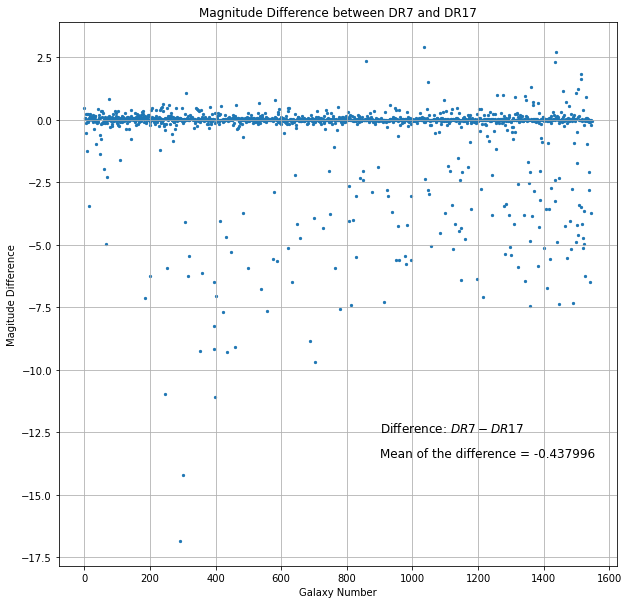

In [141]:
#difference in mag

fig = plt.figure(figsize =(10, 10))

#diff = np.fabs(np.array(bestM) - np.array(petro_g))
diff = np.array(bestM) - np.array(petro_g)


print("The mean = ", np.mean(diff))
plt.scatter(range(len(diff)), diff, s = 5)
plt.title("Magnitude Difference between DR7 and DR17")
plt.text(900, -12.5, 'Difference: $DR7 - DR17$', fontsize = 12)
plt.text(900, -13.5, 'Mean of the difference = %f' %(np.mean(diff)), fontsize = 12)
plt.xlabel("Galaxy Number")
plt.ylabel("Magitude Difference")
#plt.xlim(10,30)
#plt.ylim(10,30)
plt.grid()
plt.show()  

In [142]:
diff_wo_outlier = []

for i in range(np.size(bestM)):
    difference = np.array(bestM[i]) - np.array(petro_g[i])
    if difference <= 1 and difference >= -1:
        diff_wo_outlier.append(difference)


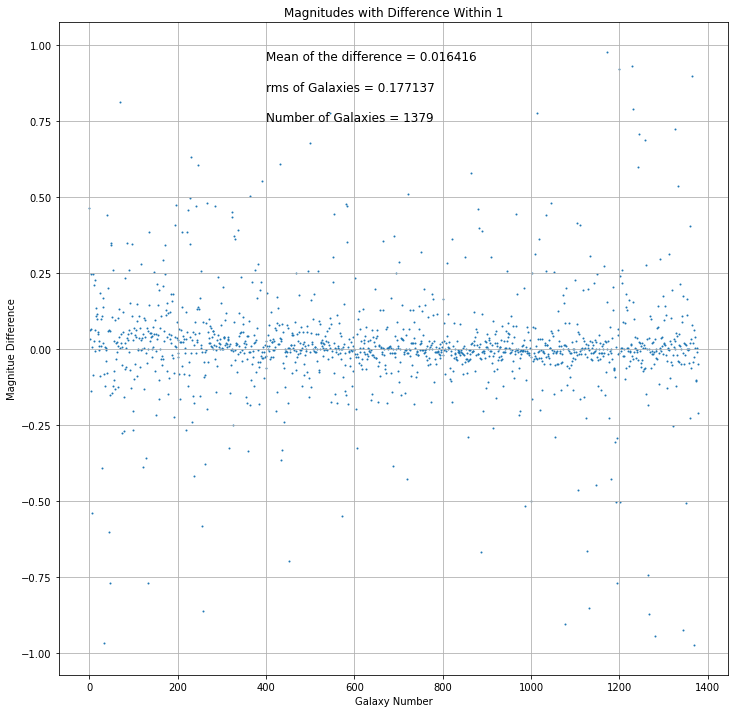

0.01641625163161711


In [143]:
#diff_wo_outlier = reject_outliers(bestM, petro_g)
"""
#print("The mean = ", mean(diff_wo_outlier))
diff_wo_outlier = np.where(np.fabs(np.array(bestM) - np.array(petro_g) <= 1))[0]
diff_wo_outlier = np.array(diff_wo_outlier)
diff_wo_outlier.astype(int)
print(type(diff_wo_outlier))
print(bestM[diff_wo_outlier])
#bestM[diff_wo_outlier] - petro_g[diff_wo_outlier]
"""
n = np.size(diff_wo_outlier)
rms = np.sqrt((1/n)*sum_sqr(diff_wo_outlier))
#print("rms of the diff of increased magnitudes",rms)

fig = plt.figure(figsize =(12, 12))
#plt.scatter(range(len(diff_wo_outlier)), diff_wo_outlier, s = 1)
plt.scatter(range(len(diff_wo_outlier)), diff_wo_outlier, s = 1)

plt.title("Magnitudes with Difference Within 1")
plt.text(400, 0.95, 'Mean of the difference = %f' %(np.mean(diff_wo_outlier)), fontsize = 12)
plt.text(400, 0.85, 'rms of Galaxies = %f' %(rms), fontsize = 12)
plt.text(400, 0.75, 'Number of Galaxies = %d' %(np.size(diff_wo_outlier)), fontsize = 12)
plt.xlabel("Galaxy Number")
plt.ylabel("Magnitue Difference")
#plt.xlim(10,30)
#plt.ylim(10,30)
plt.grid()
plt.show()
print(np.mean(diff_wo_outlier))

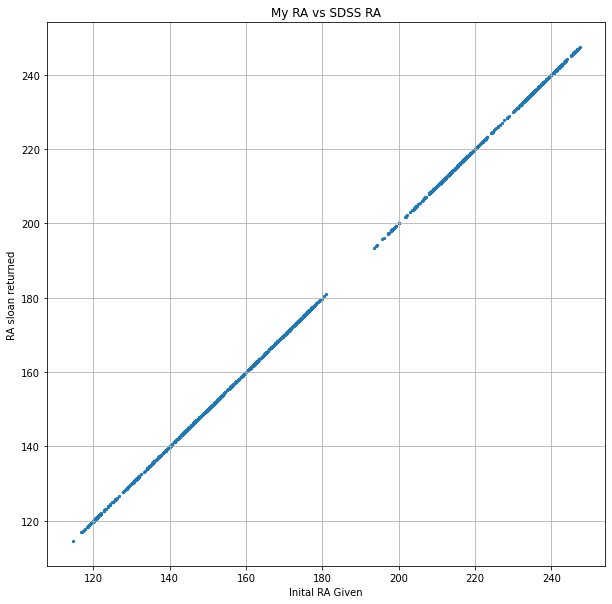

In [144]:
#difference in mag

fig = plt.figure(figsize =(10, 10))

diff = np.fabs(np.array(bestM) - np.array(petro_g))
plt.scatter(raG, newRA, s = 5)
plt.title("My RA vs SDSS RA")
plt.xlabel("Inital RA Given")
plt.ylabel("RA sloan returned")
#plt.xlim(10,30)
#plt.ylim(10,30)
plt.grid()
plt.show()  

In [145]:
np.max(diff)

16.864235

In [146]:
#sums up the square of all elements in an array 

"""
n = np.size(petro_g)
rms = np.sqrt((1/n)*sum_sqr(petro_g))
print("rms of petromag g",rms)

n = np.size(bestM)
rms = np.sqrt((1/n)*sum_sqr(bestM))
print("rms of best mag",rms)

"""
diff = np.array(bestM) - np.array(petro_g)
#diff = np.fabs(np.array(bestM) - np.array(petro_g))
n = np.size(diff)
rms = np.sqrt((1/n)*sum_sqr(diff))
print("rms of the diff",rms)

rms of the diff 1.6783357373716643


From DR7 to DR17, there are some objects who's magnitude has decreased and some who's magnitude has increased. I will first check those whose magnitudes has increased.

In [136]:
#looking for where magnitude got brighter
print("Writing file")

with open(r'mag_increase.txt', 'w') as fp:
    fp.write("Best_Mag\tPetro_Mag_g\tcModelMag\tPetroRad_g\tDifference\tMy_RA\tSDSS_RA\t\tMy_DEC\t\tSDSS_DEC\n")
    for i in range(np.size(bestM)):
        #if np.where(i == skippedIndices):
        #j = newArray[i]
        if bestM[i] > petro_g[i]:
            fp.write("%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\n" %( (bestM[i]), (petro_g[i]), (cModelMag[i]), (petroRad_g[i]), (np.fabs(bestM[i]-petro_g[i])), (raG[i]), (newRA[i]), (decG[i]), (newDEC[i]) ) )

Writing file


In [96]:
#looking for where magnitude got brighter
print("Writing file")

with open(r'mag_change.txt', 'w') as fp:
    fp.write("Best_Mag\tPetro_Mag_g\tcModelMag\tPetroRad_g\tDifference\tMy_RA\tSDSS_RA\t\tMy_DEC\t\tSDSS_DEC\n")
    for i in range(np.size(bestM)):
        #if np.where(i == skippedIndices):
        #j = newArray[i]
        #if bestM[i] - petro_g[i]:
        fp.write("%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\n" %( (bestM[i]), (petro_g[i]), (cModelMag[i]), (petroRad_g[i]), (bestM[i]-petro_g[i]), (raG[i]), (newRA[i]), (decG[i]), (newDEC[i]) ) )

Writing file


In [147]:
#maybe comment out
changeMag = pd.read_csv("mag_change.txt", delim_whitespace=True)  
changeMag["Best_Mag"]
changeMag["Petro_Mag_g"]
changeMag["cModelMag"]
changeMag["PetroRad_g"]
changeMag["Difference"]
changeMag["My_RA"]
changeMag["SDSS_RA"]
changeMag["My_DEC"]
changeMag["SDSS_DEC"]


0        9.41356
1        8.03711
2        7.47795
3       15.70974
4        6.09701
          ...   
1542     4.07563
1543    12.64770
1544    12.96143
1545     5.29078
1546    10.80985
Name: SDSS_DEC, Length: 1547, dtype: float64

In [148]:
increMag = pd.read_csv("mag_increase.txt", delim_whitespace=True)  
increMag["Best_Mag"]
increMag["Petro_Mag_g"]
increMag["cModelMag"]
increMag["PetroRad_g"]
increMag["Difference"]
increMag["My_RA"]
increMag["SDSS_RA"]
increMag["My_DEC"]
increMag["SDSS_DEC"]

0       9.41356
1       8.03711
2       7.47795
3      15.70974
4      12.98932
         ...   
765    10.24445
766    14.11477
767    12.89579
768    14.29022
769    12.64770
Name: SDSS_DEC, Length: 770, dtype: float64

In [167]:
outlier = pd.read_csv("outlier.txt", delim_whitespace=True)  
outlier["Best_Mag"]
outlier["Petro_Mag_g"]
outlier["cModelMag"]
outlier["PetroRad_g"]
outlier["Difference"]
outlier["My_RA"]
outlier["SDSS_RA"]
outlier["My_DEC"]
outlier["SDSS_DEC"]

0      12.58164
1       5.17625
2      12.61990
3       4.61583
4      12.18661
         ...   
163    14.39083
164     8.18786
165    13.90945
166    14.13008
167    12.96143
Name: SDSS_DEC, Length: 168, dtype: float64

Seeing the rms of the difference of the magnitudes, of only ones that increased

In [125]:
diff = increMag["Difference"]
n = np.size(diff)
rms = np.sqrt((1/n)*sum_sqr(diff))
print("rms of the diff of increased magnitudes",rms)

rms of the diff of increased magnitudes 0.29540871631668897


In [149]:
#check changes
indices = []

for i in range(np.size(outlier["Difference"])):
    if outlier["Difference"][i] <= -3:
        indices.append(i)

#indices = np.where( np.array(bestM) - np.array(petro_g) < -10)
np.size(indices)
#print(bestM[array])
#best - preto  = pos = brighter
#best - petro = neg = dimmer
#142/1547

113

Let's look at the photos from sdss

image 76
ra = 236.8321 and dec = 14.09861
best mag = 17.0 petro mag = 14.08465 difference = -2.91535 cModelMag = 22.31786


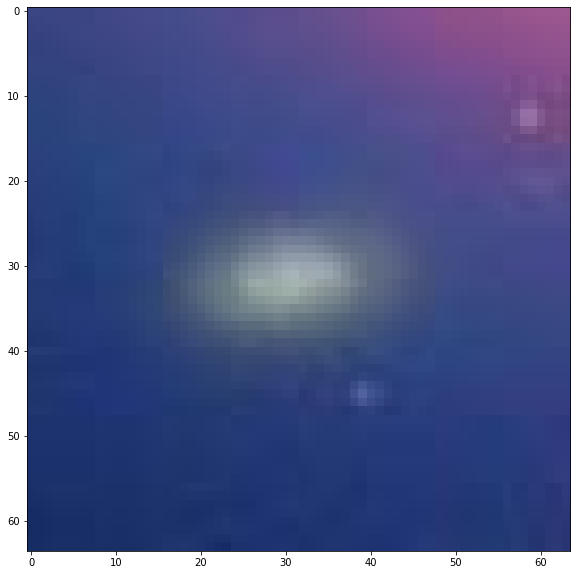

In [191]:
i = 76 #outlier[45] #106
ra = outlier["SDSS_RA"][i]
dec = outlier["SDSS_DEC"][i]

SkyServer_DataRelease = "DR17"

print("image", i)
print("ra =", ra, "and dec =", dec) 
print("best mag =", outlier["Best_Mag"][i], "petro mag =", outlier["Petro_Mag_g"][i], "difference =", outlier["Difference"][i], "cModelMag =", outlier["cModelMag"][i])
#print("ra =", ra, "and dec =", dec) 
img = SkyServer.getJpegImgCutout(ra=ra, dec=dec, width=5, height=5, scale=.8,  opt='O',
                                 dataRelease=SkyServer_DataRelease)

fig = plt.figure(figsize =(10, 10))
plt.imshow(img)


image 76
ra = 236.8321 and dec = 14.09861
best mag = 17.0 petro mag = 14.08465 difference = -2.91535


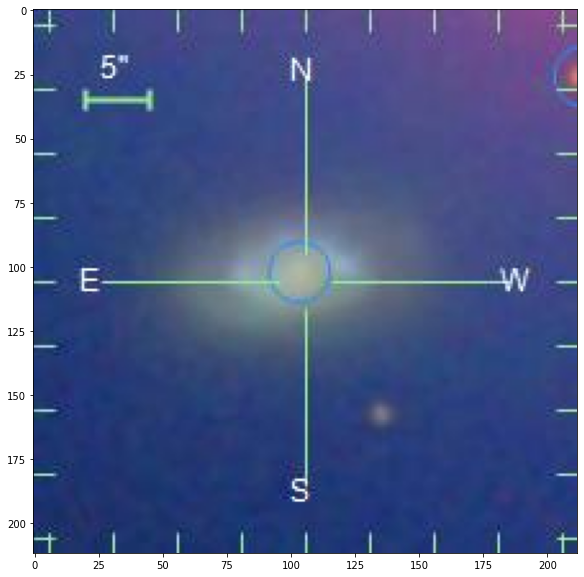

In [192]:
#i = indices[0]  #106
#DR17
ra = outlier["SDSS_RA"][i]
dec = outlier["SDSS_DEC"][i]

SkyServer_DataRelease = "DR17"

print("image", i)
print("ra =", ra, "and dec =", dec) 
print("best mag =", outlier["Best_Mag"][i], "petro mag =", outlier["Petro_Mag_g"][i], "difference =", outlier["Difference"][i])

img = SkyServer.getJpegImgCutout(ra=ra, dec=dec, width=212, height=212, scale=.2,  opt='OPG',
                                 dataRelease=SkyServer_DataRelease)

fig = plt.figure(figsize =(10, 10))
plt.imshow(img)

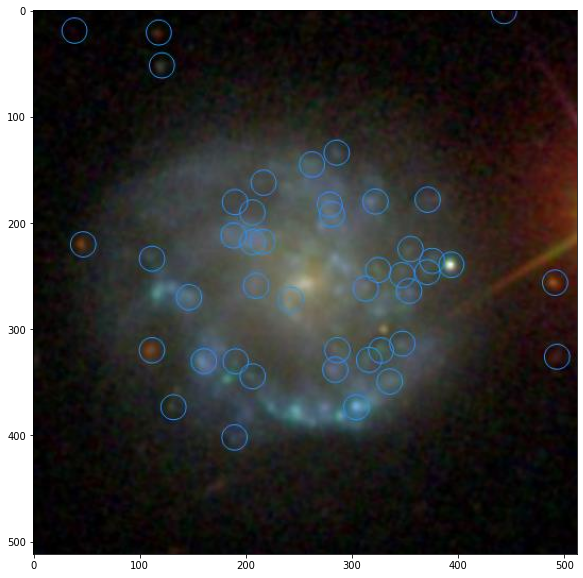

In [184]:
img = SkyServer.getJpegImgCutout(ra=ra, dec=dec, width=512, height=512, scale=0.2, opt='P', 
                                 dataRelease=SkyServer_DataRelease)

fig = plt.figure(figsize =(10, 10))
plt.imshow(img)

In [ ]:
help(SkyServer.getJpegImgCutout)

Help on function getJpegImgCutout in module SciServer.SkyServer:

getJpegImgCutout(ra, dec, scale=0.7, width=512, height=512, opt='', query='', dataRelease=None)
    Gets a rectangular image cutout from a region of the sky in SDSS, centered at (ra,dec). Return type is numpy.ndarray.
    
    
    :param ra: Right Ascension of the image's center in floating point ICRS J2000 coordinates.
    :param dec: Declination of the image's center in floating point ICRS J2000 coordinates.
    :param scale: Scale of the image, measured in [arcsec/pix]
    :param width: Width of image, measured in pixels (width in arcsec = width * scale). If larger than 2048, silently truncated to 2048.
    :param height: Height of image, measured in pixels (width in arcsec = width * scale). If larger than 2048, silently truncated to 2048.
    :param opt: Optional drawing options, expressed as concatenation of letters (string). The letters options are 
    
        "G": Grid. Draw a N-S E-W grid through the center
  

Reasons why the magnitude increased.